In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Model
import os
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt 
import numpy as np

(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


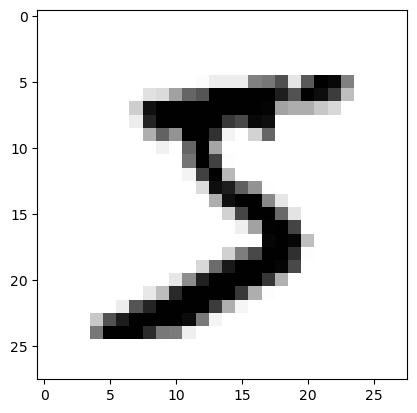

In [2]:
print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)
#ces deux lignes de code nous permettent de visualiser la premiere image 

plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [3]:
num_train = X_train.shape[0]
num_test = X_test.shape[0]

img_height = X_train.shape[1]
img_width = X_train.shape[2]
X_train = X_train.reshape((num_train, img_height*img_width))
X_train = X_test.reshape((num_test, img_height*img_width))

In [4]:
print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_train.shape)

X_train.shape = (10000, 784)
X_test.shape = (10000, 784)


In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
num_classe = 10
xi = Input(shape=(img_height*img_width,))
xo = Dense(num_classe)(xi)
yo = Activation('softmax')(xo)
model = Model(inputs = [xi], outputs =[yo])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train,
         batch_size=128,
         epochs=20,
         verbose=1,
         validation_split=0.1)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
71/71 [==============================] - 1s 12ms/step - loss: 89.6942 - accuracy: 0.0996 - val_loss: 62.8476 - val_accuracy: 0.1030
Epoch 2/20
71/71 [==============================] - 0s 6ms/step - loss: 50.2951 - accuracy: 0.1103 - val_loss: 45.3817 - val_accuracy: 0.0930
Epoch 3/20
71/71 [==============================] - 0s 6ms/step - loss: 38.0143 - accuracy: 0.1114 - val_loss: 38.6559 - val_accuracy: 0.0950
Epoch 4/20
71/71 [==============================] - 0s 5ms/step - loss: 31.8700 - accuracy: 0.1151 - val_loss: 33.8525 - val_accuracy: 0.1010
Epoch 5/20
71/71 [==============================] - 0s 6ms/step - loss: 28.4286 - accuracy: 0.1268 - val_loss: 29.4104 - val_accuracy: 0.0990
Epoch 6/20
71/71 [==============================] - 0s 5ms/step - loss: 24.8339 - accuracy: 0.1247 - val_loss: 28.0562 - val_accuracy: 0.0980
Epoch 7/20
71/71 [==============================] - 0s 6ms/step - loss: 22.8575 - accuracy: 0.1292 - val_loss: 25.4893 - val_accuracy: 0.0980
Epoch

InvalidArgumentError: Graph execution error:

Detected at node 'model/dense/BiasAdd' defined at (most recent call last):
    File "C:\Users\ibmer\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ibmer\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ibmer\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\ibmer\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\ibmer\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ibmer\AppData\Local\Temp\ipykernel_18636\470819113.py", line 7, in <module>
      score = model.evaluate(X_test, y_test, verbose=0)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'model/dense/BiasAdd'
In[0] and In[1] has different ndims: [32,28,28] vs. [784,10]
	 [[{{node model/dense/BiasAdd}}]] [Op:__inference_test_function_7462]

In [9]:
def generate_unique_logpath(logdir, raw_run_name):
    i=0
    while(True):
        run_name=raw_run_name + "-" + str(i)
        log_path = os.path.join(logdir, run_name)
        if not os.path.isdir(log_path):
            return log_path
        i=i+1
        
#définition du callback de surveillance et de sauvegarder sur tensorboard
run_name = "linear"
logpath = generate_unique_logpath("./logs_linear", run_name)
tbcb = TensorBoard(log_dir=logpath)

#définition du callback de surveillance et de sauvegarder du meilleur modèle

checkpoint_filepath = os.path.join(logpath, "best_model.h5")
checkpoint_cb = ModelCheckpoint(checkpoint_filepath, save_best_only=True)

model.fit(X_train, y_train,
         batch_size =128,
    epochs = 20,
    verbose=1,
    validation_split=0.1,
    callbacks=[tbcb,checkpoint_cb])
score = model.evaluate(X_test, y_test, verbose =0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
71/71 [==============================] - 1s 8ms/step - loss: 9.0222 - accuracy: 0.1714 - val_loss: 12.5450 - val_accuracy: 0.0960
Epoch 2/20
71/71 [==============================] - 0s 6ms/step - loss: 9.2241 - accuracy: 0.1638 - val_loss: 13.2246 - val_accuracy: 0.1030
Epoch 3/20
71/71 [==============================] - 0s 6ms/step - loss: 8.7229 - accuracy: 0.1711 - val_loss: 11.8779 - val_accuracy: 0.0880
Epoch 4/20
71/71 [==============================] - 0s 6ms/step - loss: 7.9288 - accuracy: 0.1721 - val_loss: 11.7346 - val_accuracy: 0.0720
Epoch 5/20
71/71 [==============================] - 0s 6ms/step - loss: 8.2731 - accuracy: 0.1673 - val_loss: 13.0247 - val_accuracy: 0.0950
Epoch 6/20
71/71 [==============================] - 0s 6ms/step - loss: 7.9838 - accuracy: 0.1662 - val_loss: 11.5283 - val_accuracy: 0.1050
Epoch 7/20
71/71 [==============================] - 0s 5ms/step - loss: 7.8817 - accuracy: 0.1738 - val_loss: 12.5165 - val_accuracy: 0.0890
Epoch 8/20
71

InvalidArgumentError: Graph execution error:

Detected at node 'model/dense/BiasAdd' defined at (most recent call last):
    File "C:\Users\ibmer\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ibmer\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ibmer\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\ibmer\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\ibmer\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ibmer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ibmer\AppData\Local\Temp\ipykernel_18636\470819113.py", line 7, in <module>
      score = model.evaluate(X_test, y_test, verbose=0)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'model/dense/BiasAdd'
In[0] and In[1] has different ndims: [32,28,28] vs. [784,10]
	 [[{{node model/dense/BiasAdd}}]] [Op:__inference_test_function_7462]

In [12]:
with h5py.File(checkpoint_filepath, 'a') as f: 
    if 'optimizer_weights' in f.keys():
        del f['optimizer_weights']
        
model = load_model(checkpoint_filepath)
score = model.evaluate(X_test, y_test, verbose=0)
print ('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: in user code:

    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ibmer\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)


In [14]:
xi = Input(shape=(img_height*img_width,), name="input")
mean = X_train.mean(axis=0)
std= X_train.std(axis=0)+1.0
x1 = Lambda(lambda image, mu, std: (image - mu)/ std,
           arguments={'mu':mean, 'std':std})(xi)
xo = Dense(num_classe, name="y")(x1)
yo = Activation('softmax', name="y_act")(xo)
model = Model(inputs=[xi], outputs=[yo])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 lambda_1 (Lambda)           (None, 784)               0         
                                                                 
 y (Dense)                   (None, 10)                7850      
                                                                 
 y_act (Activation)          (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_classes = 10 
nhidden1=150
nhidden2=150
input_shape=(img_height*img_width)

xi = Input(shape=input_shape)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0) + 0.1
x = Lambda(lambda image, mu, std: (image-mu)/std,
          arguments={'mu': mean, 'std': std})(xi)

x = Dense(nhidden1)(x)
x = Activation('relu')(x)
x = Dense(nhidden2)(x)
x = Activation('relu')(x)
x = Dense(num_classes)(x)
y = Activation('softmax')(x)
model = Model(inputs=[xi], outputs=[y])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 lambda_4 (Lambda)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 150)               117750    
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1510

In [19]:
...
x = Dense(nhidden1, kernel_regularizer=regularizers.l2(l2_reg))(x)

NameError: name 'l2_reg' is not defined

In [20]:
x = Dense(nhidden1)(x)
x = Activation('relu')(x)
if(args.dropout):
    x = Dropout(0.5)(x)

NameError: name 'args' is not defined

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_train = X_train.shape[0]
num_test = X_test.shape[0]

img_height = X_train.shape[1]
img_width = X_train.shape[2]
X_train = X_train.reshape((num_train, img_height, img_width))
X_test = X_test.reshape((num_test, img_height, img_width))
img_rows= img_height
img_cols=img_width
input_shape=(img_rows, img_cols,1)
xi = Input(shape=input_shape)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0) + 1.0
x = Lambda(lambda image, mu, std: (image-mu)/std,
          arguments={'mu': mean, 'std': std})(xi)
x = Conv2D(filters=64,
          kernel_size=5, strides=1)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = flatten()(x)
x = Activation('relu')(x)

x = Dense(64)(x)
x = Activation('relu')(x)
x = Dense(10, activation='softmax')(x)

NameError: name 'Conv2D' is not defined